In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


In [ ]:
# 1. CARGA Y VISTA INICIAL DE DATOS
print("=" * 80)
print("1. CARGA DE DATOS")
print("=" * 80)

# Cargar el dataset
df = pd.read_csv('../datos/Food_Delivery_Times.csv')

print(f"\nDimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print("\nPrimeras 5 filas:")
print(df.head())

1. CARGA DE DATOS

Dimensiones del dataset: 1000 filas x 9 columnas

Primeras 5 filas:
   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  


In [7]:
print("\n" + "=" * 80)
print("2. INFORMACIÓN GENERAL")
print("=" * 80)
print("\nInformación del dataset:")
df.info()


2. INFORMACIÓN GENERAL

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [8]:
print("\n" + "=" * 80)
print("3. ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 80)
print("\nEstadísticas para variables numéricas:")
print(df.describe())

print("\nEstadísticas para variables categóricas:")
print(df.describe(include='object'))


3. ESTADÍSTICAS DESCRIPTIVAS

Estadísticas para variables numéricas:
          Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
count  1000.000000  1000.000000           1000.000000              970.000000   
mean    500.500000    10.059970             16.982000                4.579381   
std     288.819436     5.696656              7.204553                2.914394   
min       1.000000     0.590000              5.000000                0.000000   
25%     250.750000     5.105000             11.000000                2.000000   
50%     500.500000    10.190000             17.000000                5.000000   
75%     750.250000    15.017500             23.000000                7.000000   
max    1000.000000    19.990000             29.000000                9.000000   

       Delivery_Time_min  
count        1000.000000  
mean           56.732000  
std            22.070915  
min             8.000000  
25%            41.000000  
50%            55.500000  
75%        


4. ANÁLISIS DE VALORES FALTANTES

Variables con valores faltantes:
                        Valores Faltantes  Porcentaje (%)
Weather                                30             3.0
Traffic_Level                          30             3.0
Time_of_Day                            30             3.0
Courier_Experience_yrs                 30             3.0


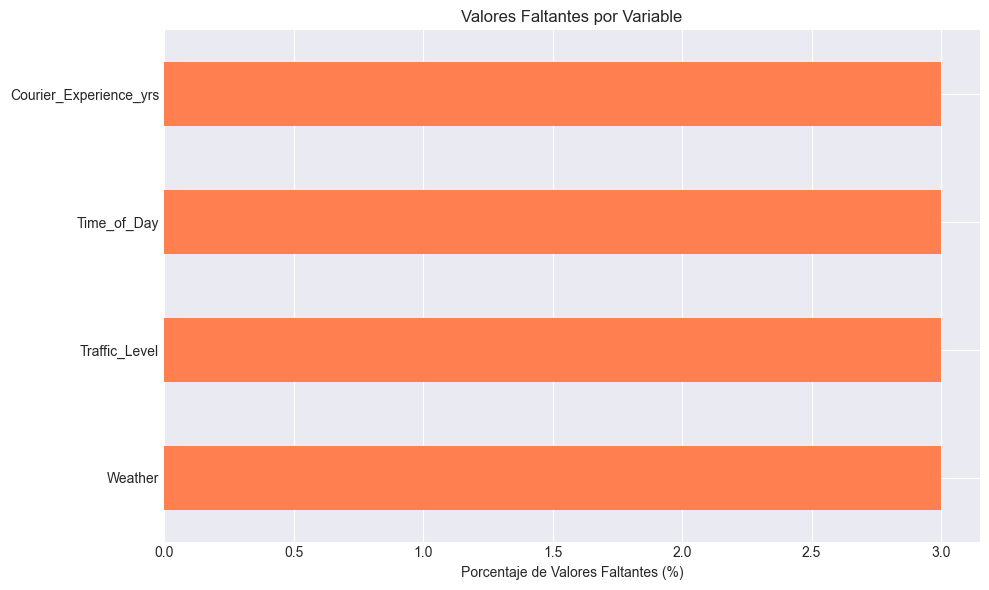

In [9]:
# 4. VALORES FALTANTES
print("\n" + "=" * 80)
print("4. ANÁLISIS DE VALORES FALTANTES")
print("=" * 80)

missing = df.isnull().sum()
missing_pct = 100 * df.isnull().sum() / len(df)
missing_table = pd.DataFrame({
    'Valores Faltantes': missing,
    'Porcentaje (%)': missing_pct
})
missing_table = missing_table[missing_table['Valores Faltantes'] > 0].sort_values(
    'Porcentaje (%)', ascending=False
)

if len(missing_table) > 0:
    print("\nVariables con valores faltantes:")
    print(missing_table)
    
    # Visualización de valores faltantes
    plt.figure(figsize=(10, 6))
    missing_table['Porcentaje (%)'].plot(kind='barh', color='coral')
    plt.xlabel('Porcentaje de Valores Faltantes (%)')
    plt.title('Valores Faltantes por Variable')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No hay valores faltantes en el dataset")


5. ANÁLISIS UNIVARIADO

--- Variable Objetivo: Delivery_Time_min ---
Media: 56.73 minutos
Mediana: 55.50 minutos
Desviación estándar: 22.07 minutos
Mínimo: 8.00 minutos
Máximo: 153.00 minutos


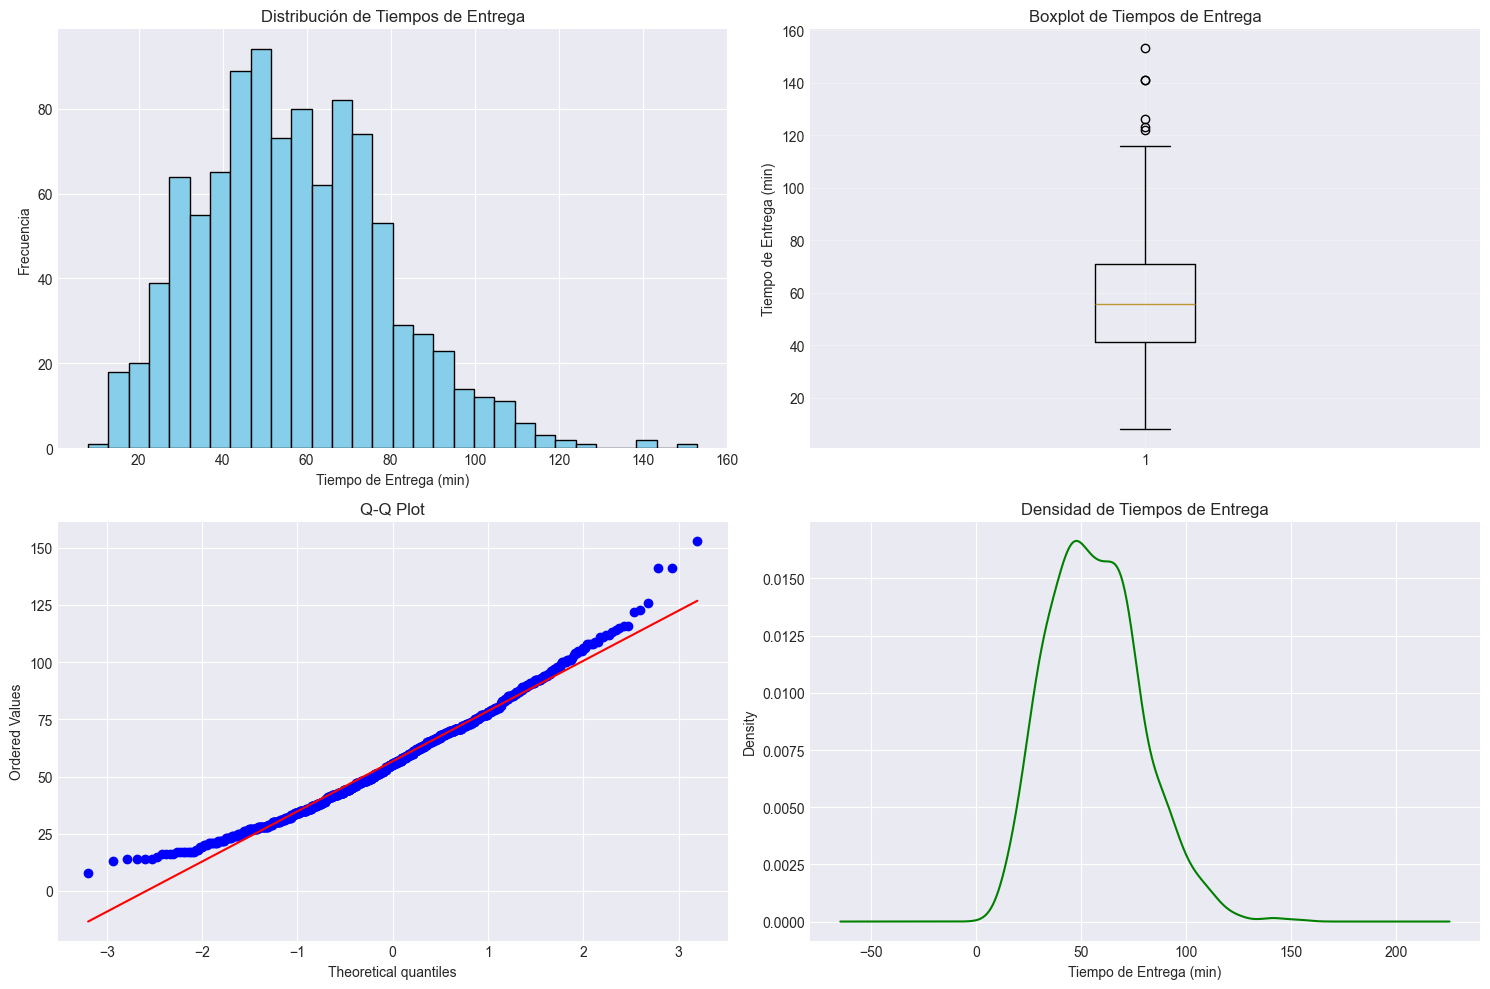


--- Variables Numéricas ---


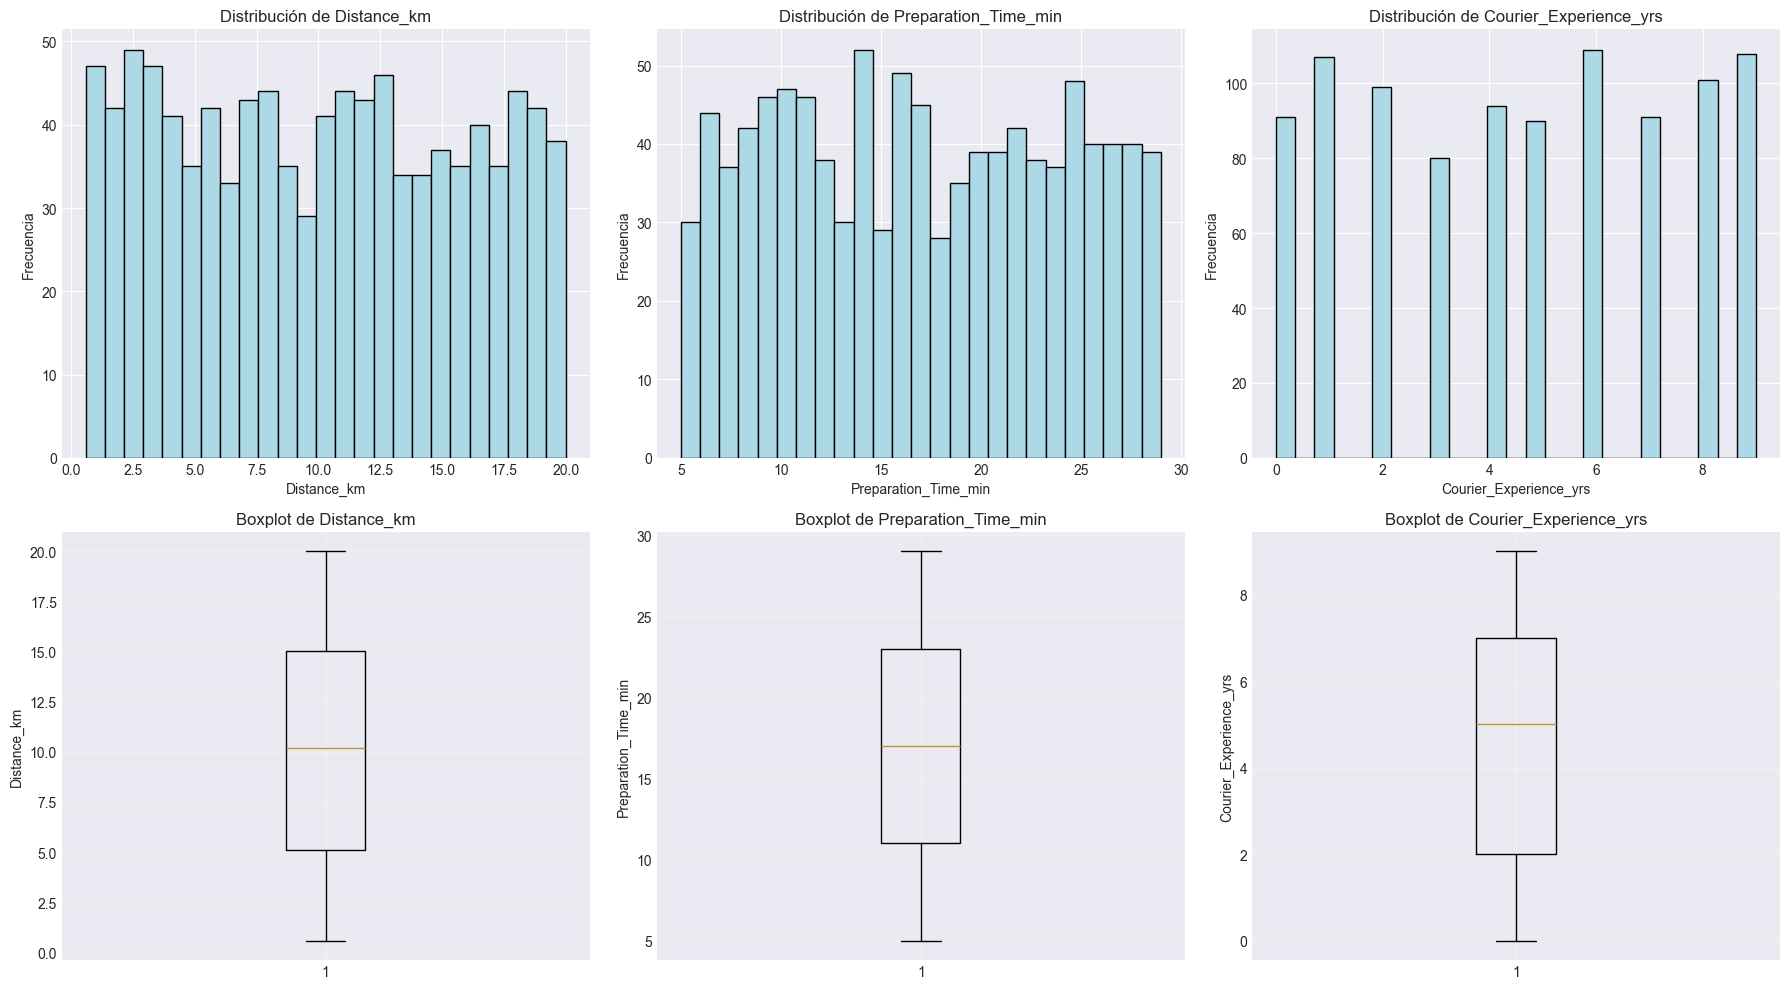

In [10]:
# 5. ANÁLISIS UNIVARIADO
print("\n" + "=" * 80)
print("5. ANÁLISIS UNIVARIADO")
print("=" * 80)

# Variable objetivo: Delivery_Time_min
print("\n--- Variable Objetivo: Delivery_Time_min ---")
print(f"Media: {df['Delivery_Time_min'].mean():.2f} minutos")
print(f"Mediana: {df['Delivery_Time_min'].median():.2f} minutos")
print(f"Desviación estándar: {df['Delivery_Time_min'].std():.2f} minutos")
print(f"Mínimo: {df['Delivery_Time_min'].min():.2f} minutos")
print(f"Máximo: {df['Delivery_Time_min'].max():.2f} minutos")

# Visualización de la variable objetivo
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma
axes[0, 0].hist(df['Delivery_Time_min'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Tiempo de Entrega (min)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Tiempos de Entrega')

# Boxplot
axes[0, 1].boxplot(df['Delivery_Time_min'], vert=True)
axes[0, 1].set_ylabel('Tiempo de Entrega (min)')
axes[0, 1].set_title('Boxplot de Tiempos de Entrega')
axes[0, 1].grid(True, alpha=0.3)

# QQ-plot
stats.probplot(df['Delivery_Time_min'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')

# KDE
df['Delivery_Time_min'].plot(kind='kde', ax=axes[1, 1], color='green')
axes[1, 1].set_xlabel('Tiempo de Entrega (min)')
axes[1, 1].set_title('Densidad de Tiempos de Entrega')

plt.tight_layout()
plt.show()

# Análisis de variables numéricas
print("\n--- Variables Numéricas ---")
numeric_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Histograma
    axes[i].hist(df[col].dropna(), bins=25, color='lightblue', edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_title(f'Distribución de {col}')
    
    # Boxplot
    axes[i+3].boxplot(df[col].dropna(), vert=True)
    axes[i+3].set_ylabel(col)
    axes[i+3].set_title(f'Boxplot de {col}')
    axes[i+3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


--- Variables Categóricas ---

Weather:
Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

Traffic_Level:
Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64

Time_of_Day:
Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

Vehicle_Type:
Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64


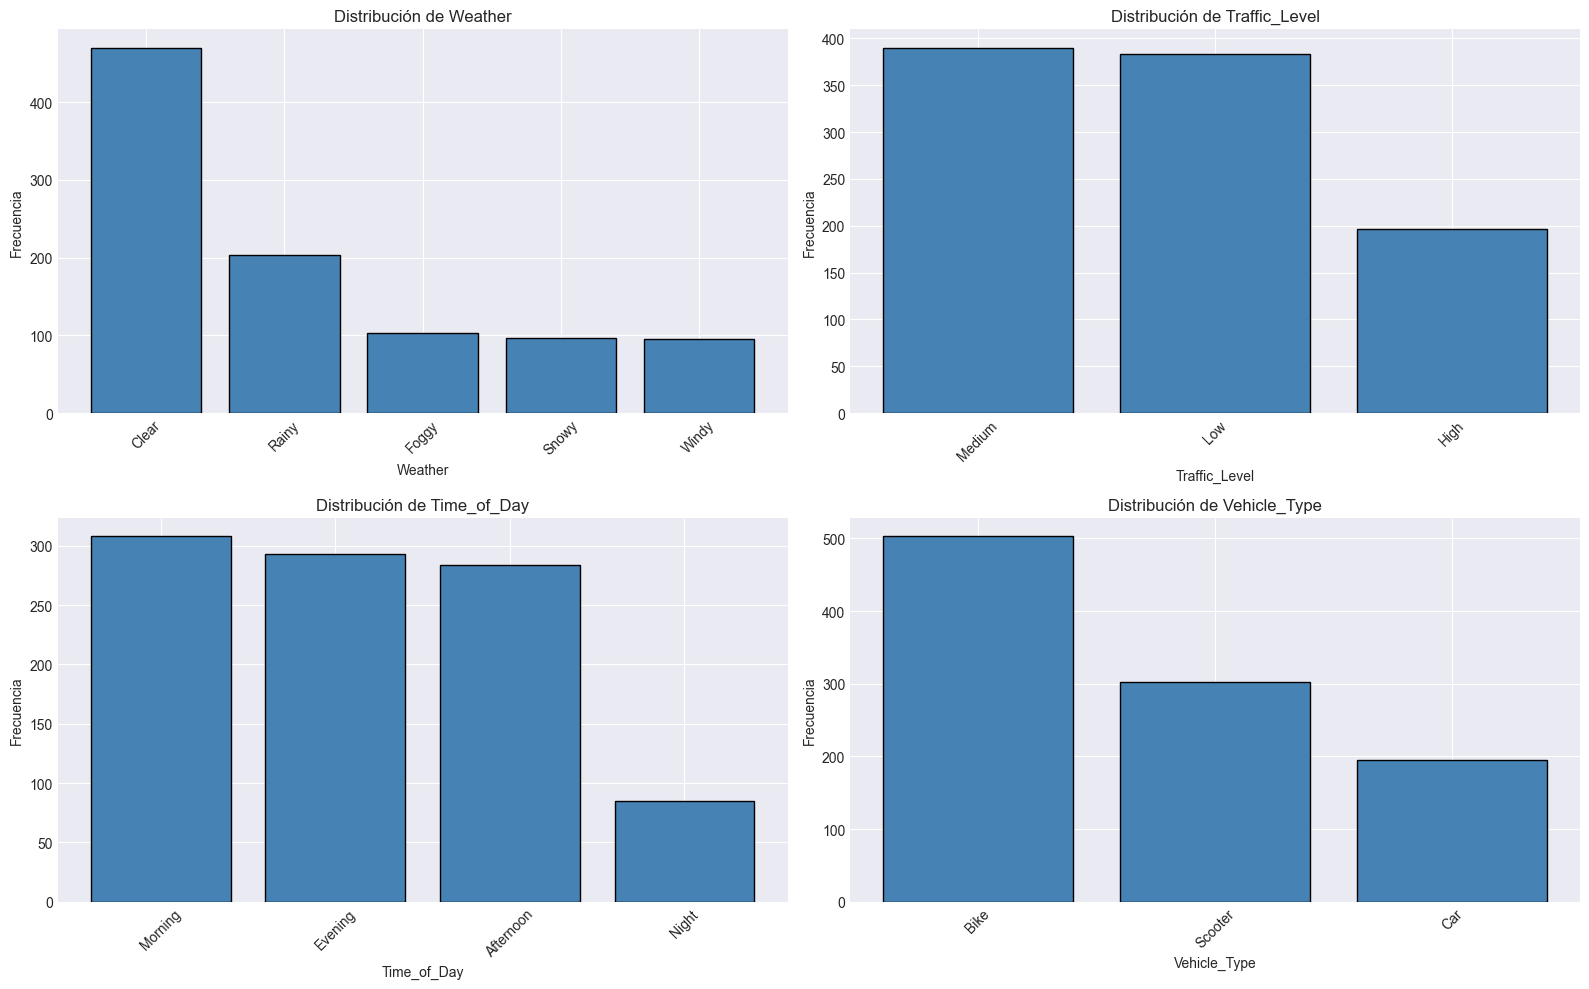

In [11]:
# Análisis de variables categóricas
print("\n--- Variables Categóricas ---")
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = df[col].value_counts()
    print(f"\n{col}:")
    print(counts)
    
    axes[i].bar(counts.index, counts.values, color='steelblue', edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


6. ANÁLISIS BIVARIADO

--- Matriz de Correlación ---
                        Distance_km  Preparation_Time_min  \
Distance_km                1.000000             -0.009302   
Preparation_Time_min      -0.009302              1.000000   
Courier_Experience_yrs    -0.007842             -0.030830   
Delivery_Time_min          0.777820              0.308425   

                        Courier_Experience_yrs  Delivery_Time_min  
Distance_km                          -0.007842           0.777820  
Preparation_Time_min                 -0.030830           0.308425  
Courier_Experience_yrs                1.000000          -0.090433  
Delivery_Time_min                    -0.090433           1.000000  


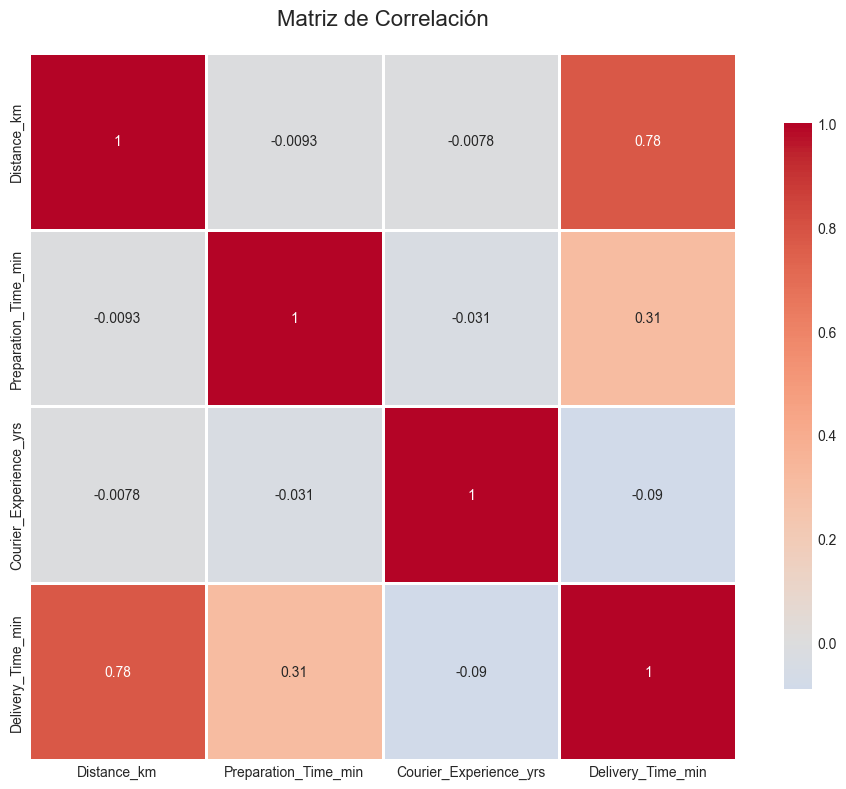

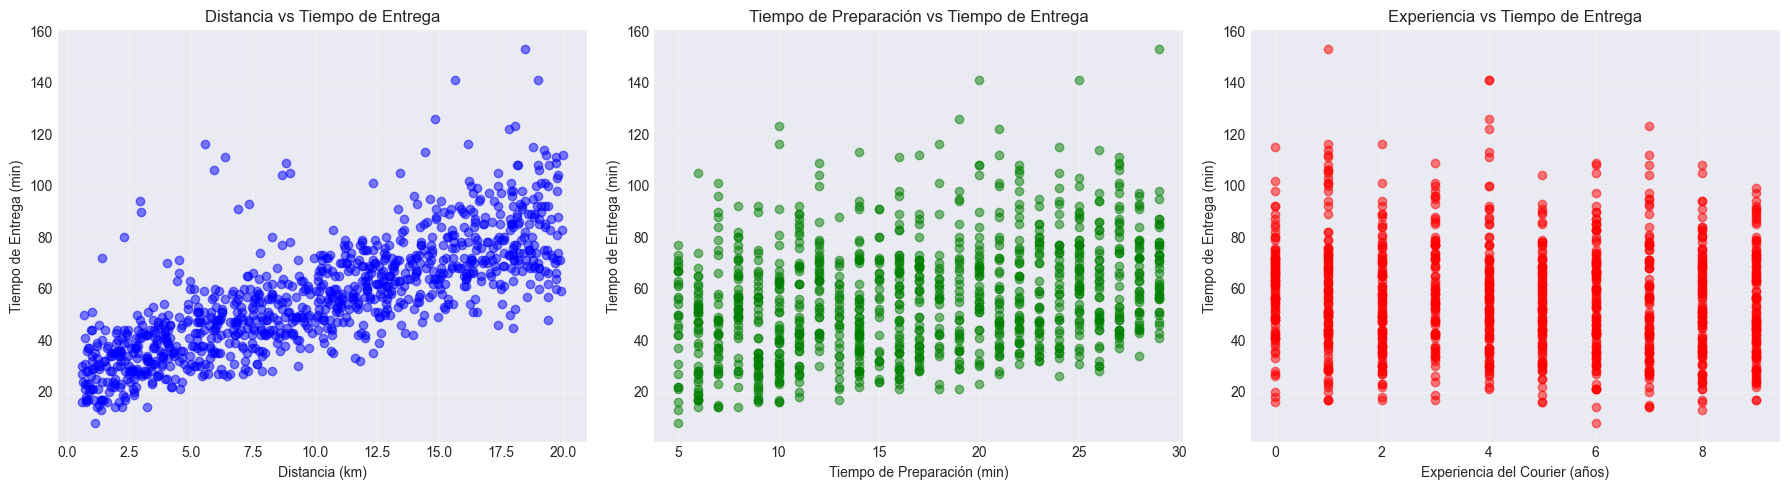

In [12]:
# 6. ANÁLISIS BIVARIADO
print("\n" + "=" * 80)
print("6. ANÁLISIS BIVARIADO")
print("=" * 80)

# Correlación entre variables numéricas
print("\n--- Matriz de Correlación ---")
numeric_data = df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 
                    'Delivery_Time_min']].dropna()
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(df['Distance_km'], df['Delivery_Time_min'], alpha=0.5, color='blue')
axes[0].set_xlabel('Distancia (km)')
axes[0].set_ylabel('Tiempo de Entrega (min)')
axes[0].set_title('Distancia vs Tiempo de Entrega')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df['Preparation_Time_min'], df['Delivery_Time_min'], alpha=0.5, color='green')
axes[1].set_xlabel('Tiempo de Preparación (min)')
axes[1].set_ylabel('Tiempo de Entrega (min)')
axes[1].set_title('Tiempo de Preparación vs Tiempo de Entrega')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(df['Courier_Experience_yrs'], df['Delivery_Time_min'], alpha=0.5, color='red')
axes[2].set_xlabel('Experiencia del Courier (años)')
axes[2].set_ylabel('Tiempo de Entrega (min)')
axes[2].set_title('Experiencia vs Tiempo de Entrega')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


--- Tiempo de Entrega por Variables Categóricas ---

Weather:
         count       mean        std   min    25%   50%    75%    max
Weather                                                              
Clear    470.0  53.082979  21.272211   8.0  37.00  52.0  67.75  153.0
Foggy    103.0  59.466019  20.862207  25.0  43.00  59.0  71.00  116.0
Rainy    204.0  59.794118  22.822441  15.0  42.00  57.5  73.00  141.0
Snowy     97.0  67.113402  21.291565  24.0  51.00  66.0  85.00  115.0
Windy     96.0  55.458333  21.777785  16.0  39.75  55.0  71.25  122.0

Traffic_Level:
               count       mean        std   min   25%   50%   75%    max
Traffic_Level                                                            
High           197.0  64.807107  21.869356  21.0  48.0  65.0  79.0  122.0
Low            383.0  52.885117  21.683646   8.0  36.0  51.0  68.0  141.0
Medium         390.0  56.020513  21.186516  13.0  42.0  53.5  71.0  123.0

Time_of_Day:
             count       mean        std   min 

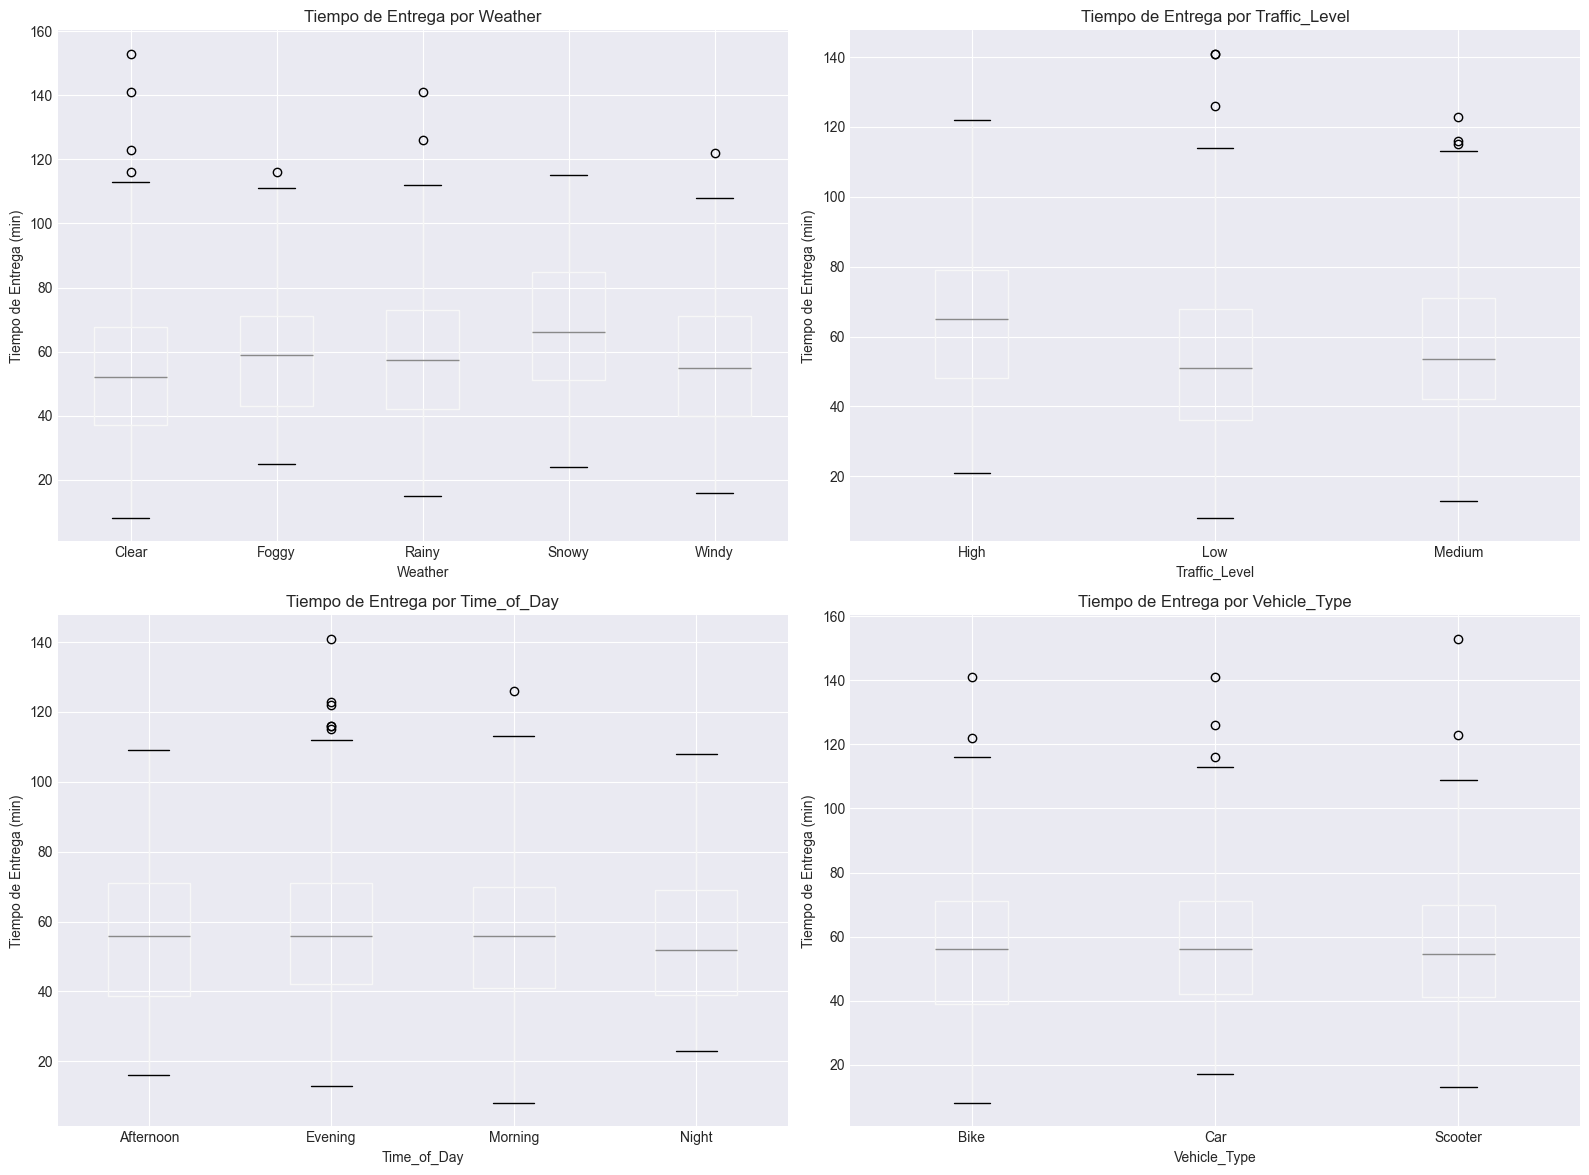

In [13]:
# Análisis por variables categóricas
print("\n--- Tiempo de Entrega por Variables Categóricas ---")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    df_clean = df[[col, 'Delivery_Time_min']].dropna()
    df_clean.boxplot(column='Delivery_Time_min', by=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Tiempo de Entrega (min)')
    axes[i].set_title(f'Tiempo de Entrega por {col}')
    axes[i].get_figure().suptitle('')
    
    # Estadísticas
    print(f"\n{col}:")
    print(df_clean.groupby(col)['Delivery_Time_min'].describe())

plt.tight_layout()
plt.show()

In [14]:
# 7. DETECCIÓN DE OUTLIERS
print("\n" + "=" * 80)
print("7. DETECCIÓN DE OUTLIERS")
print("=" * 80)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numeric_cols_with_target = numeric_cols + ['Delivery_Time_min']

for col in numeric_cols_with_target:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    pct_outliers = (len(outliers) / len(df)) * 100
    print(f"\n{col}:")
    print(f"  Límite inferior: {lower:.2f}")
    print(f"  Límite superior: {upper:.2f}")
    print(f"  Cantidad de outliers: {len(outliers)} ({pct_outliers:.2f}%)")


7. DETECCIÓN DE OUTLIERS

Distance_km:
  Límite inferior: -9.76
  Límite superior: 29.89
  Cantidad de outliers: 0 (0.00%)

Preparation_Time_min:
  Límite inferior: -7.00
  Límite superior: 41.00
  Cantidad de outliers: 0 (0.00%)

Courier_Experience_yrs:
  Límite inferior: -5.50
  Límite superior: 14.50
  Cantidad de outliers: 0 (0.00%)

Delivery_Time_min:
  Límite inferior: -4.00
  Límite superior: 116.00
  Cantidad de outliers: 6 (0.60%)


In [15]:
# 8. RESUMEN Y CONCLUSIONES
print("\n" + "=" * 80)
print("8. RESUMEN Y CONCLUSIONES")
print("=" * 80)

print(f"""
RESUMEN DEL ANÁLISIS EXPLORATORIO:

1. Dataset:
   - Total de registros: {len(df)}
   - Total de variables: {len(df.columns)}
   - Variables numéricas: {len(df.select_dtypes(include=[np.number]).columns)}
   - Variables categóricas: {len(df.select_dtypes(include=['object']).columns)}

2. Variable Objetivo (Delivery_Time_min):
   - Promedio: {df['Delivery_Time_min'].mean():.2f} minutos
   - Rango: {df['Delivery_Time_min'].min():.0f} - {df['Delivery_Time_min'].max():.0f} minutos
   
3. Correlaciones más fuertes con Delivery_Time_min:
{correlation_matrix['Delivery_Time_min'].sort_values(ascending=False).to_string()}

4. Valores Faltantes:
   - Total de valores faltantes: {df.isnull().sum().sum()}
   - Variables afectadas: {len(missing_table) if len(missing_table) > 0 else 0}

5. Características del Delivery:
   - Distancia promedio: {df['Distance_km'].mean():.2f} km
   - Tiempo de preparación promedio: {df['Preparation_Time_min'].mean():.2f} min
   - Experiencia promedio de couriers: {df['Courier_Experience_yrs'].mean():.2f} años
   - Tipo de vehículo más común: {df['Vehicle_Type'].mode()[0]}
   - Condición climática más frecuente: {df['Weather'].mode()[0]}
""")

print("\n" + "=" * 80)
print("EDA COMPLETADO")
print("=" * 80)


8. RESUMEN Y CONCLUSIONES

RESUMEN DEL ANÁLISIS EXPLORATORIO:

1. Dataset:
   - Total de registros: 1000
   - Total de variables: 9
   - Variables numéricas: 5
   - Variables categóricas: 4

2. Variable Objetivo (Delivery_Time_min):
   - Promedio: 56.73 minutos
   - Rango: 8 - 153 minutos

3. Correlaciones más fuertes con Delivery_Time_min:
Delivery_Time_min         1.000000
Distance_km               0.777820
Preparation_Time_min      0.308425
Courier_Experience_yrs   -0.090433

4. Valores Faltantes:
   - Total de valores faltantes: 120
   - Variables afectadas: 4

5. Características del Delivery:
   - Distancia promedio: 10.06 km
   - Tiempo de preparación promedio: 16.98 min
   - Experiencia promedio de couriers: 4.58 años
   - Tipo de vehículo más común: Bike
   - Condición climática más frecuente: Clear


EDA COMPLETADO
